In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
weather_df=pd.read_csv("weather_data.csv")

In [70]:
price_df=pd.read_csv("price_demand_data.csv")

In [5]:
display(weather_df)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,24/08/2021,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,25/08/2021,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,29/08/2021,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [6]:
# data cleaning - covert the Date with from string to date format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%d/%m/%Y')

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [8]:
 # data cleaning - delete columns contains not a number value
weather_df=weather_df.dropna(subset=['Maximum temperature (°C)'])

In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [71]:
# data cleanning - split the SETTLEMENTDATE to Date and TIME
price_df[['Date','TIME']]=price_df['SETTLEMENTDATE'].str.split(' ', expand=True)

In [72]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
 4   Date            11664 non-null  object 
 5   TIME            11664 non-null  object 
dtypes: float64(1), object(5)
memory usage: 546.9+ KB


In [73]:
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%d/%m/%Y')

In [74]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          11664 non-null  object        
 1   SETTLEMENTDATE  11664 non-null  object        
 2   TOTALDEMAND     11664 non-null  float64       
 3   PRICECATEGORY   11664 non-null  object        
 4   Date            11664 non-null  datetime64[ns]
 5   TIME            11664 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 546.9+ KB


In [14]:
# get max. energy usage of each day
new_price_df=price_df.groupby(['Date'])['TOTALDEMAND'].max().reset_index()
new_price_df.rename(columns= {'TOTALDEMAND':'MAXDEMAND'}, inplace=True)
new_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   MAXDEMAND  244 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [15]:
display(new_price_df)

,Date,MAXDEMAND
0,2021-01-01,5019.64
1,2021-01-02,4964.35
2,2021-01-03,4503.31
3,2021-01-04,4764.18
4,2021-01-05,4800.64
...,...,...
239,2021-08-28,5716.32
240,2021-08-29,6227.89
241,2021-08-30,6072.91
242,2021-08-31,5779.56


In [16]:
new_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   MAXDEMAND  244 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [17]:
#merge and combine the data sets
df=pd.merge(new_price_df,weather_df,how="inner", on="Date")

In [18]:
display(df)

,Date,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,5019.64,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2021-01-02,4964.35,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,2021-01-03,4503.31,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,2021-01-04,4764.18,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,2021-01-05,4800.64,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6717.65,6.4,13.1,10.4,4.0,6.2,S,39,9:38,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,2021-08-25,6736.80,8.0,14.1,2.2,1.2,5.4,S,37,16:26,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,2021-08-28,5716.32,5.3,17.8,0.0,1.6,9.6,N,39,13:14,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,2021-08-29,6227.89,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


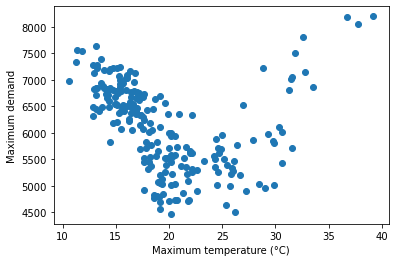

Pearson r is -0.2550987001766938


In [19]:
plt.scatter(df['Maximum temperature (°C)'], df['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.show()
print("Pearson r is",df['Maximum temperature (°C)'].corr(df['MAXDEMAND']))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   MAXDEMAND                          218 non-null    float64       
 2   Minimum temperature (°C)           218 non-null    float64       
 3   Maximum temperature (°C)           218 non-null    float64       
 4   Rainfall (mm)                      218 non-null    float64       
 5   Evaporation (mm)                   218 non-null    float64       
 6   Sunshine (hours)                   218 non-null    float64       
 7   Direction of maximum wind gust     218 non-null    object        
 8   Speed of maximum wind gust (km/h)  218 non-null    int64         
 9   Time of maximum wind gust          218 non-null    object        
 10  9am Temperature (°C)               218

In [21]:
from sklearn.metrics.cluster import normalized_mutual_info_score
df['max_temp_binned']=pd.cut(df['Maximum temperature (°C)'], bins=4)
df['demand_binned']=pd.cut(df['MAXDEMAND'], bins=4)
display(df)
nmi=normalized_mutual_info_score(df['demand_binned'],df['max_temp_binned'], average_method='min')
print("NMI : "+ str(nmi))

,Date,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),max_temp_binned,demand_binned
0,2021-01-01,5019.64,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,...,2,1018.8,28.1,43,5,E,13,1015.3,"(24.9, 32.05]","(4469.326, 5403.995]"
1,2021-01-02,4964.35,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,...,17,1013.3,28.7,38,7,SW,4,1008.5,"(24.9, 32.05]","(4469.326, 5403.995]"
2,2021-01-03,4503.31,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,...,4,1007.7,23.5,59,4,SW,2,1005.2,"(24.9, 32.05]","(4469.326, 5403.995]"
3,2021-01-04,4764.18,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,...,11,1010.0,18.2,82,8,SW,17,1011.0,"(17.75, 24.9]","(4469.326, 5403.995]"
4,2021-01-05,4800.64,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,...,13,1012.5,18.2,82,8,SE,19,1013.3,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6717.65,6.4,13.1,10.4,4.0,6.2,S,39,9:38,...,17,1021.5,11.7,55,6,S,17,1021.6,"(10.571, 17.75]","(6334.94, 7265.885]"
214,2021-08-25,6736.80,8.0,14.1,2.2,1.2,5.4,S,37,16:26,...,15,1023.3,13.4,59,6,SW,17,1021.8,"(10.571, 17.75]","(6334.94, 7265.885]"
215,2021-08-28,5716.32,5.3,17.8,0.0,1.6,9.6,N,39,13:14,...,7,1018.6,17.4,31,3,NW,24,1013.5,"(17.75, 24.9]","(5403.995, 6334.94]"
216,2021-08-29,6227.89,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,...,13,1011.4,12.8,84,7,S,6,1010.4,"(10.571, 17.75]","(5403.995, 6334.94]"


NMI : 0.32508594193182894


In [22]:
FEATURES=['MAXDEMAND','Maximum temperature (°C)']
df[FEATURES].corr(method='pearson')

,MAXDEMAND,Maximum temperature (°C)
MAXDEMAND,1.000000,-0.255099
Maximum temperature (°C),-0.255099,1.000000


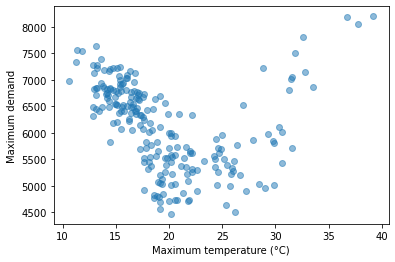

In [23]:
plt.scatter(df['Maximum temperature (°C)'], df['MAXDEMAND'],alpha=0.5)
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.show()

In [48]:
summer_start_date = '2020-12-01'
summer_end_date = '2021-02-28'
# Select DataFrame rows between two dates
mask = (df['Date'] >= summer_start_date) & (df['Date'] <= summer_end_date)
df_summer = df.loc[mask]

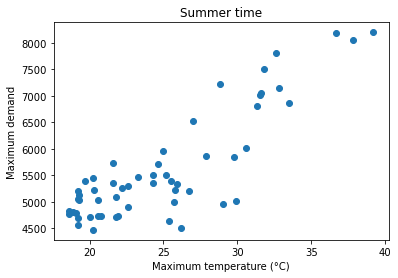

Pearson r is 0.8518240526639236 in summer time


In [49]:
plt.scatter(df_summer['Maximum temperature (°C)'], df_summer['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Summer time")
plt.show()
print("Pearson r is",df_summer['Maximum temperature (°C)'].corr(df_summer['MAXDEMAND']),"in summer time")

In [31]:
winter_start_date = '2021-06-01'
winter_end_date = '2021-08-31'
# Select DataFrame rows between two dates
mask = (df['Date'] >= winter_start_date) & (df['Date'] <= winter_end_date)
df_winter = df.loc[mask]

In [43]:
display(df_winter)

,Date,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),max_temp_binned,demand_binned
135,2021-06-01,6945.56,5.7,15.7,0.0,4.0,1.3,N,39,11:32,...,13,1020.8,15.3,48,7,N,17,1019.4,"(10.571, 17.75]","(6334.94, 7265.885]"
136,2021-06-02,6564.70,9.2,19.6,0.0,3.2,7.7,NW,33,13:14,...,9,1018.8,19.0,44,5,N,11,1015.2,"(17.75, 24.9]","(6334.94, 7265.885]"
137,2021-06-03,6421.12,10.4,16.9,0.2,3.4,7.5,N,24,1:09,...,7,1015.1,16.7,62,5,SW,9,1012.9,"(10.571, 17.75]","(6334.94, 7265.885]"
138,2021-06-04,6934.53,10.0,13.6,2.0,1.2,2.0,S,37,15:23,...,7,1017.0,11.9,66,7,W,7,1018.5,"(10.571, 17.75]","(6334.94, 7265.885]"
139,2021-06-05,6484.85,3.8,12.9,0.0,1.4,3.5,N,52,14:43,...,11,1021.4,12.0,57,7,N,26,1017.6,"(10.571, 17.75]","(6334.94, 7265.885]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6717.65,6.4,13.1,10.4,4.0,6.2,S,39,9:38,...,17,1021.5,11.7,55,6,S,17,1021.6,"(10.571, 17.75]","(6334.94, 7265.885]"
214,2021-08-25,6736.80,8.0,14.1,2.2,1.2,5.4,S,37,16:26,...,15,1023.3,13.4,59,6,SW,17,1021.8,"(10.571, 17.75]","(6334.94, 7265.885]"
215,2021-08-28,5716.32,5.3,17.8,0.0,1.6,9.6,N,39,13:14,...,7,1018.6,17.4,31,3,NW,24,1013.5,"(17.75, 24.9]","(5403.995, 6334.94]"
216,2021-08-29,6227.89,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,...,13,1011.4,12.8,84,7,S,6,1010.4,"(10.571, 17.75]","(5403.995, 6334.94]"


In [35]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 135 to 217
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               83 non-null     datetime64[ns]
 1   MAXDEMAND                          83 non-null     float64       
 2   Minimum temperature (°C)           83 non-null     float64       
 3   Maximum temperature (°C)           83 non-null     float64       
 4   Rainfall (mm)                      83 non-null     float64       
 5   Evaporation (mm)                   83 non-null     float64       
 6   Sunshine (hours)                   83 non-null     float64       
 7   Direction of maximum wind gust     83 non-null     object        
 8   Speed of maximum wind gust (km/h)  83 non-null     int64         
 9   Time of maximum wind gust          83 non-null     object        
 10  9am Temperature (°C)               83

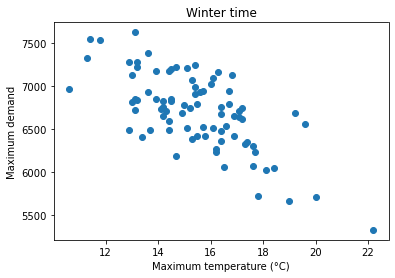

Pearson r is -0.6840476215969429 in winter time.


In [47]:
plt.scatter(df_winter['Maximum temperature (°C)'], df_winter['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Winter time")
plt.show()
print("Pearson r is",df_winter['Maximum temperature (°C)'].corr(df_winter['MAXDEMAND']),"in winter time.")

In [57]:
autumn_start_date = '2021-3-01'
autumn_end_date = '2021-5-31'
# Select DataFrame rows between two dates
mask = (df['Date'] >= autumn_start_date) & (df['Date'] <= autumn_end_date)
df_autumn = df.loc[mask]

In [59]:
display(df_autumn)

,Date,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),max_temp_binned,demand_binned
56,2021-03-01,5225.37,13.8,21.7,0.0,6.4,6.3,S,44,18:35,...,6,1012.3,19.7,67,6,S,15,1012.2,"(17.75, 24.9]","(4469.326, 5403.995]"
57,2021-03-02,5459.22,13.3,18.1,0.0,6.2,1.4,SW,39,13:24,...,15,1018.1,17.0,44,7,SW,15,1018.6,"(17.75, 24.9]","(5403.995, 6334.94]"
58,2021-03-03,5526.41,14.2,17.7,0.0,4.4,2.1,SW,33,14:42,...,11,1020.0,17.3,54,7,S,13,1019.8,"(10.571, 17.75]","(5403.995, 6334.94]"
59,2021-03-04,5528.66,13.6,21.4,0.0,4.0,2.6,SW,35,22:37,...,11,1017.2,19.0,60,7,SW,7,1015.3,"(17.75, 24.9]","(5403.995, 6334.94]"
60,2021-03-05,5319.54,15.0,18.0,1.4,4.4,3.6,S,35,0:36,...,13,1015.1,17.1,53,7,SW,20,1015.7,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2021-05-26,6801.36,11.9,14.7,5.0,3.4,1.4,NW,39,5:45,...,11,1016.9,13.9,53,7,W,11,1019.7,"(10.571, 17.75]","(6334.94, 7265.885]"
131,2021-05-27,6551.00,9.8,15.0,0.4,1.6,0.6,W,33,14:15,...,4,1025.9,14.2,73,7,SW,11,1025.3,"(10.571, 17.75]","(6334.94, 7265.885]"
132,2021-05-28,6887.79,11.0,13.8,0.4,0.4,0.5,S,39,7:07,...,15,1031.8,12.7,59,7,S,11,1032.4,"(10.571, 17.75]","(6334.94, 7265.885]"
133,2021-05-29,6441.38,10.4,13.1,0.0,2.0,4.1,SE,26,14:41,...,6,1034.2,12.7,55,5,S,13,1032.3,"(10.571, 17.75]","(6334.94, 7265.885]"


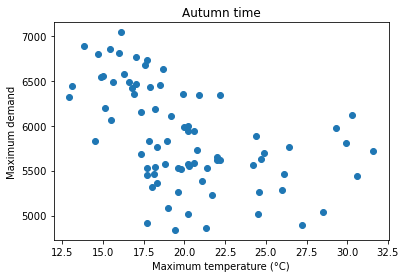

Pearson r is -0.49014070464895904 in winter time.


In [58]:
plt.scatter(df_autumn['Maximum temperature (°C)'], df_autumn['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Autumn time")
plt.show()
print("Pearson r is",df_autumn['Maximum temperature (°C)'].corr(df_autumn['MAXDEMAND']),"in winter time.")

In [60]:
df_autumn

,Date,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),max_temp_binned,demand_binned
56,2021-03-01,5225.37,13.8,21.7,0.0,6.4,6.3,S,44,18:35,...,6,1012.3,19.7,67,6,S,15,1012.2,"(17.75, 24.9]","(4469.326, 5403.995]"
57,2021-03-02,5459.22,13.3,18.1,0.0,6.2,1.4,SW,39,13:24,...,15,1018.1,17.0,44,7,SW,15,1018.6,"(17.75, 24.9]","(5403.995, 6334.94]"
58,2021-03-03,5526.41,14.2,17.7,0.0,4.4,2.1,SW,33,14:42,...,11,1020.0,17.3,54,7,S,13,1019.8,"(10.571, 17.75]","(5403.995, 6334.94]"
59,2021-03-04,5528.66,13.6,21.4,0.0,4.0,2.6,SW,35,22:37,...,11,1017.2,19.0,60,7,SW,7,1015.3,"(17.75, 24.9]","(5403.995, 6334.94]"
60,2021-03-05,5319.54,15.0,18.0,1.4,4.4,3.6,S,35,0:36,...,13,1015.1,17.1,53,7,SW,20,1015.7,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2021-05-26,6801.36,11.9,14.7,5.0,3.4,1.4,NW,39,5:45,...,11,1016.9,13.9,53,7,W,11,1019.7,"(10.571, 17.75]","(6334.94, 7265.885]"
131,2021-05-27,6551.00,9.8,15.0,0.4,1.6,0.6,W,33,14:15,...,4,1025.9,14.2,73,7,SW,11,1025.3,"(10.571, 17.75]","(6334.94, 7265.885]"
132,2021-05-28,6887.79,11.0,13.8,0.4,0.4,0.5,S,39,7:07,...,15,1031.8,12.7,59,7,S,11,1032.4,"(10.571, 17.75]","(6334.94, 7265.885]"
133,2021-05-29,6441.38,10.4,13.1,0.0,2.0,4.1,SE,26,14:41,...,6,1034.2,12.7,55,5,S,13,1032.3,"(10.571, 17.75]","(6334.94, 7265.885]"


In [64]:
price_df.PRICECATEGORY.unique()

array(['LOW', 'MEDIUM', 'HIGH', 'EXTREME'], dtype=object)

In [109]:
def bin_rating(x):
    """
     Price category 
         LOW = $200/MWh,
         MEDIUM = $400/MWh,
         HIGH = $600/MWh,
         EXTREME = $800/MWh
    """
    
    # [min, 5)
    if x=="LOW":
        return 200
    elif x =="MEDIUM":
        return 400 
    elif x == "HIGH":
        return 600
    elif x == "EXTREME":
        return 800

# apply the function on the series
price_df['Price_rating'] = price_df['PRICECATEGORY'].apply(bin_rating)

In [84]:
price_df

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,TIME,Price_rating
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,0:30,200
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,1:00,200
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,1:30,200
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,2:00,200
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,2:30,200
...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00,400
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30,400
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00,400
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30,400


In [110]:
max_price_df=price_df.groupby(['Date'])['Price_rating'].max().reset_index()
max_price_df.rename(columns= {'Price_rating':'Max_Price'}, inplace=True)
max_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   Max_Price  244 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [86]:
display(max_price_df)

,Date,Max_Price
0,2021-01-01,200
1,2021-01-02,200
2,2021-01-03,200
3,2021-01-04,200
4,2021-01-05,200
...,...,...
239,2021-08-28,400
240,2021-08-29,800
241,2021-08-30,600
242,2021-08-31,400


In [111]:
#merge and combine the data sets
df_2=pd.merge(max_price_df,weather_df,how="inner", on="Date")

In [90]:
display(df_2)

,Date,Max_Price,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,200,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2021-01-02,200,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,2021-01-03,200,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,2021-01-04,200,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,2021-01-05,200,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,600,6.4,13.1,10.4,4.0,6.2,S,39,9:38,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,2021-08-25,800,8.0,14.1,2.2,1.2,5.4,S,37,16:26,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,2021-08-28,400,5.3,17.8,0.0,1.6,9.6,N,39,13:14,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,2021-08-29,800,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


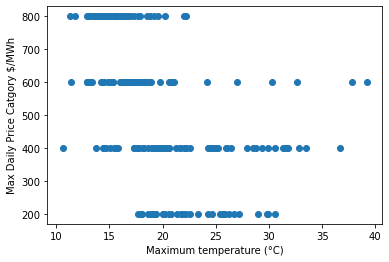

Pearson r is -0.49879369215508323


In [106]:
plt.scatter(df_2['Maximum temperature (°C)'], df_2['Max_Price'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Max Daily Price Catgory $/MWh")
plt.show()
print("Pearson r is",df_2['Maximum temperature (°C)'].corr(df_2['Max_Price']))

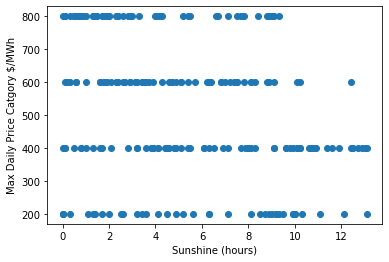

Pearson r is -0.29178175022594727


In [107]:
plt.scatter(df_2['Sunshine (hours)'], df_2['Max_Price'])
plt.xlabel("Sunshine (hours)")
plt.ylabel("Max Daily Price Catgory $/MWh")
plt.show()
print("Pearson r is",df_2['Sunshine (hours)'].corr(df_2['Max_Price']))

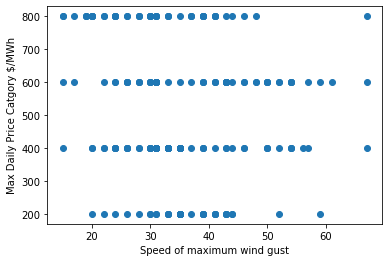

Pearson r is -0.12929123311598115


In [108]:
plt.scatter(df_2['Speed of maximum wind gust (km/h)'], df_2['Max_Price'])
plt.xlabel('Speed of maximum wind gust')
plt.ylabel("Max Daily Price Catgory $/MWh")
plt.show()
print("Pearson r is",df_2['Speed of maximum wind gust (km/h)'].corr(df_2['Max_Price']))